In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import io 
from skimage import filters

##  INF250 Exam 2022
### Nora Mikarlsen 

#### Exercise 1

In [66]:
soccer_im = io.imread("soccerteam.jpg")
soccer_im = soccer_im.mean(axis=2)

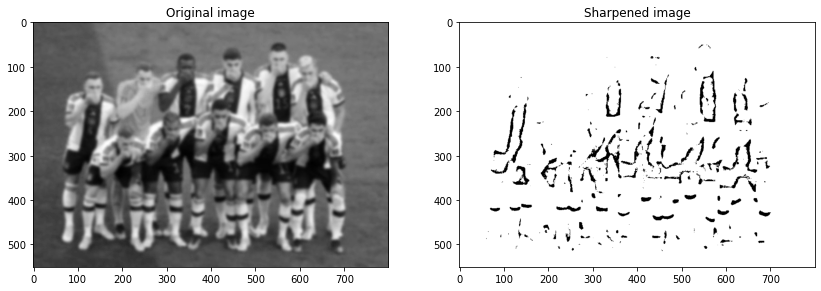

In [139]:
fig, axes = plt.subplots(ncols = 2, figsize =(14, 7))
ax = axes.ravel()
ax[0].imshow(soccer_im, cmap="gray")
ax[0].set_title("Original image")
ax[1].set_title("Sharpened image")

sharpened_im = filters.unsharp_mask(soccer_im, radius=3, amount=5)
ax[1].imshow(sharpened_im, cmap="gray")

In [136]:
def hist_equalisation(image):
    """
    Takes in an image, computes the original histogram for the image, then a cumulative histogram
    for the image, then performs a histogram equalisation on the image.

    :param image: original image
    :return: image_he: histogram equalised image
    """
    # Histogram equalisation
    shape = np.shape(image)
    if len(shape) == 3:
        image = image.mean(axis=2)

    histogram = np.zeros(256)
    for i in range(shape[0]):
        for j in range(shape[1]):
            pixval = int(image[i, j])
            try:
                histogram[pixval] += 1
            except IndexError:
                histogram[255] +=1

    cumhist = np.zeros(256)
    cumhist[0] = histogram[0]
    for i in range(255):
        cumhist[i + 1] = cumhist[i] + histogram[i + 1]

    K = 256
    M = shape[0]
    N = shape[1]
    image_he = np.zeros(image.shape)
    for i in range(M):
        for j in range(N):
            a = int(image[i, j])
            try:
                b = cumhist[a] * (K - 1) / M * N
            except IndexError:
                b = cumhist[255] * (K - 1) / M * N
            image_he[i, j] = b
   
    return image_he

In [137]:
hist_eq = hist_equalisation(soccer_im)

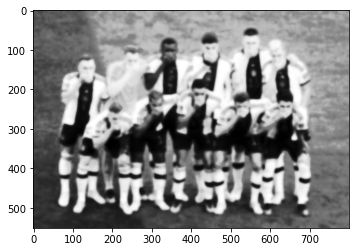

In [133]:
plt.imshow(hist_eq, cmap="gray")

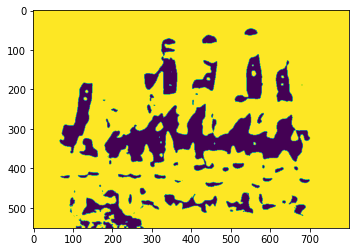

In [122]:
shp_im = filters.unsharp_mask(soccer_im, radius=100, amount=2)
plt.imshow(shp_im)

In [123]:
laplace_im = filters.laplace(soccer_im, ksize=4)

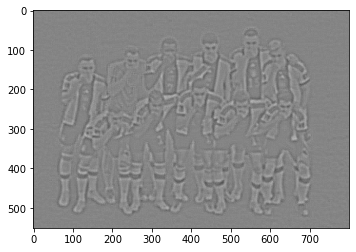

In [124]:
plt.imshow(laplace_im, cmap="gray")

In [125]:
laplace_im

array([[ 0.,  1.,  0., ...,  0., -1.,  0.],
       [ 0.,  2.,  0., ...,  1., -1.,  0.],
       [ 2., -2.,  1., ...,  1., -2., -1.],
       ...,
       [-2.,  1., -2., ..., -1., -1.,  1.],
       [-1.,  0.,  1., ...,  2.,  1.,  2.],
       [-1.,  0.,  0., ...,  1.,  0.,  1.]])

In [126]:
soccer_im

array([[ 86.66666667,  86.66666667,  85.66666667, ..., 110.33333333,
        109.33333333, 109.33333333],
       [ 86.66666667,  86.66666667,  85.66666667, ..., 110.33333333,
        109.33333333, 109.33333333],
       [ 86.66666667,  85.66666667,  85.66666667, ..., 110.33333333,
        109.33333333, 109.33333333],
       ...,
       [ 64.        ,  65.        ,  65.        , ...,  94.        ,
         95.        ,  96.        ],
       [ 64.        ,  65.        ,  66.        , ...,  95.        ,
         96.        ,  97.        ],
       [ 64.        ,  65.        ,  66.        , ...,  95.        ,
         96.        ,  97.        ]])

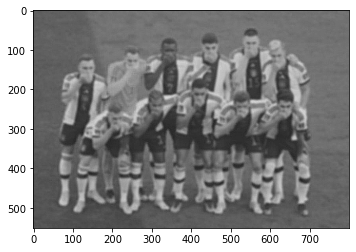

In [134]:
amount = 5
filtered = filters.laplace(soccer_im)
sharpened = soccer_im + amount*filtered
plt.imshow(sharpened, cmap="gray")

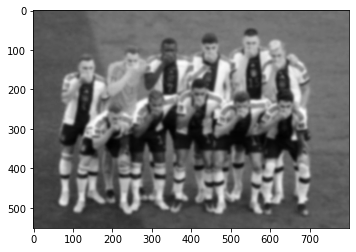

In [128]:
plt.imshow(soccer_im, cmap="gray")

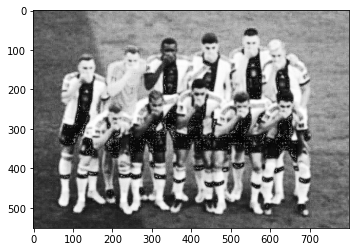

In [138]:
hist_im = hist_equalisation(sharpened)
plt.imshow(hist_im, cmap="gray")

In [130]:
soccer_im.shape

(551, 800)